In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

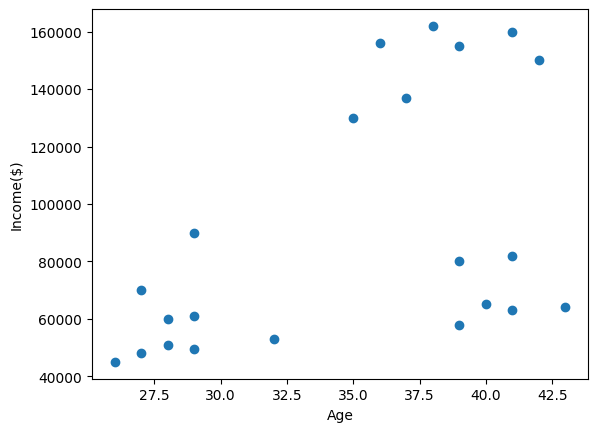

In [9]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [12]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [13]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

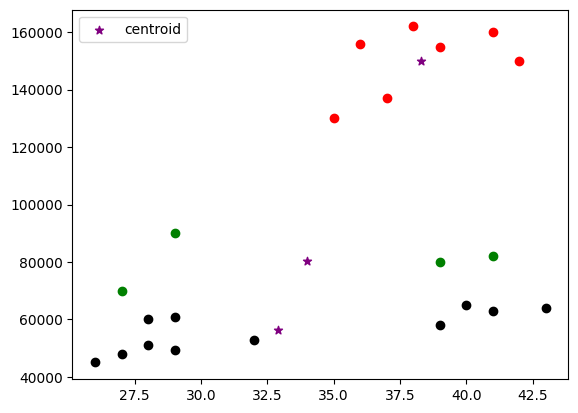

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [18]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

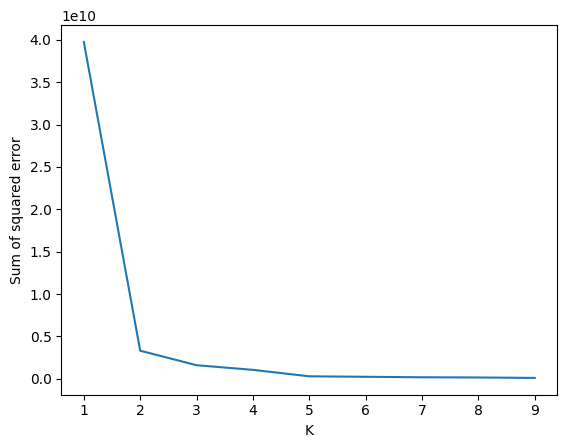

In [19]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [22]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [25]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(df_scaled)
    sse.append(km.inertia_)


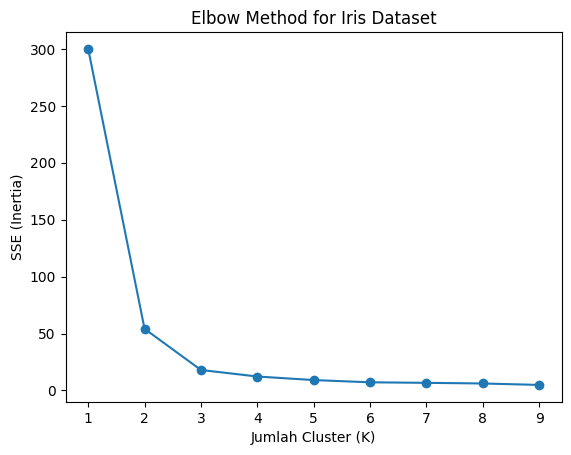

In [26]:
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Iris Dataset')
plt.show()


In [27]:
km = KMeans(n_clusters=3, random_state=0)
y_pred = km.fit_predict(df_scaled)

df['cluster'] = y_pred
df.head()


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


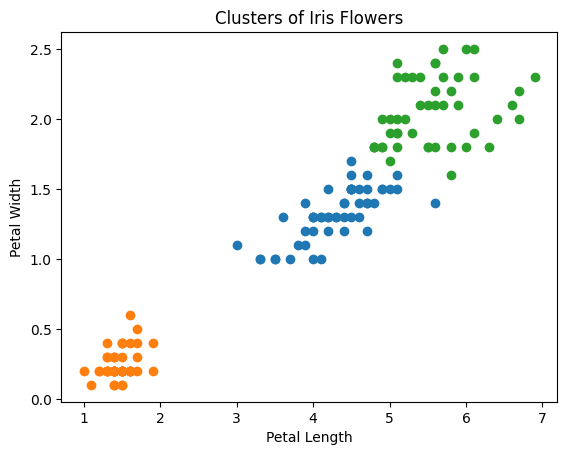

In [28]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Clusters of Iris Flowers")
plt.show()


In [29]:
df['species'] = iris.target
df.head()


,petal length (cm),petal width (cm),cluster,species
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0


In [30]:
import numpy as np

for i in range(3):
    print(f"\nCluster {i}:")
    print(np.bincount(df[df.cluster == i].species))



Cluster 0:
[ 0 48  4]

Cluster 1:
[50]

Cluster 2:
[ 0  2 46]


Cluster 0:
[50, 0, 0] -> Setosa

Cluster 1:
[0, 48, 2] -> Versicolor

Cluster 2:
[0, 2, 48] -> Virginica


In [32]:
cluster_map = {
    0 : "Setosa",
    1 : "Versicolor",
    2 : "Virginica"
}

df['predicted_species'] = df.cluster.map(cluster_map)


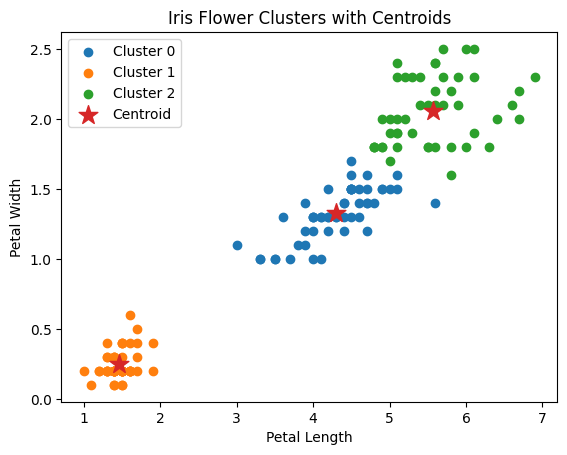

In [33]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], label='Cluster 0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='Cluster 1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='Cluster 2')

# Tambahkan centroid (ingat: pakai data yang belum di-scale)
centroids = scaler.inverse_transform(km.cluster_centers_)

plt.scatter(centroids[:,0], centroids[:,1],
            marker='*', s=200, label='Centroid')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Flower Clusters with Centroids")
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import accuracy_score

# Buat mapping manual (contoh ini dari hasil di atas)
cluster_map_numeric = {
    0 : 0,  # Setosa
    1 : 1,  # Versicolor
    2 : 2   # Virginica
}

df['mapped_cluster'] = df.cluster.map(cluster_map_numeric)

accuracy = accuracy_score(df['species'], df['mapped_cluster'])
print("Accuracy:", accuracy)


Accuracy: 0.30666666666666664


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# X = fitur, y = label asli
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['species']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)


In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_knn_pred = knn.predict(X_test_scaled)


In [39]:
from sklearn.metrics import accuracy_score

knn_acc = accuracy_score(y_test, y_knn_pred)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 1.0


In [40]:
accuracy = accuracy_score(df['species'], df['mapped_cluster'])
print("KMeans Accuracy:", accuracy)


KMeans Accuracy: 0.30666666666666664


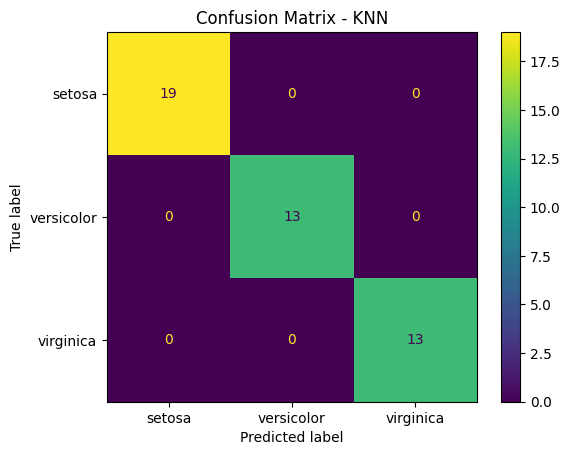

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_knn_pred)

ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names).plot()
plt.title("Confusion Matrix - KNN")
plt.show()


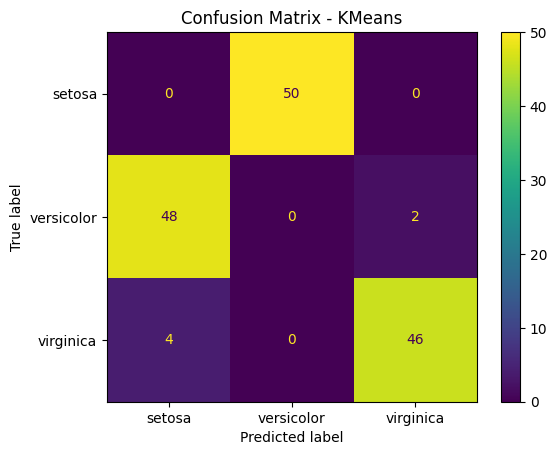

In [42]:
cm_kmeans = confusion_matrix(df['species'], df['mapped_cluster'])

ConfusionMatrixDisplay(cm_kmeans, display_labels=iris.target_names).plot()
plt.title("Confusion Matrix - KMeans")
plt.show()
